1) The tips.csv dataset contains data on tips collected from a restaurant.

a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for
males overlaid with a histogram of tips for females. Discuss what you found.
b. Repeat part a, but broken down by time.

2) Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues =2, … Sun = 7).

3) Apply this function to the day column of tips and include the result as a new column intips, called weekday_num.

4) Create a function called est_tip. The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this, we will look at “nearby” values (i.e. tip, where the value of total_bill is near the value of interest.) For example, if we want to predict the tip for total bill value of $20, we will simply look at all total bills near $20 and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. For example, for a window of $1, we will look at all bills totaling $19 thru $21. The output of
this function will be the predicted tip amount.

5) Apply this function to the total_bill column of tips and include the result as a new
column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip
amount.

1) The tips.csv dataset contains data on tips collected from a restaurant.

a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for
males overlaid with a histogram of tips for females. Discuss what you found.
b. Repeat part a, but broken down by time.

In [1]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
tips = Table.read_table('tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for
males overlaid with a histogram of tips for females. Discuss what you found.

In [3]:
tips_male = tips.where('sex', 'Male')
tips_female = tips.where('sex', 'Female')
tips_male

total_bill,tip,sex,smoker,day,time,size
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2
10.27,1.71,Male,No,Sun,Dinner,2
15.42,1.57,Male,No,Sun,Dinner,2


In [4]:
avg_male_tip = np.mean(tips_male.column('tip'))
avg_male_tip

3.0896178343949043

In [5]:
tips_female

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
35.26,5,Female,No,Sun,Dinner,4
14.83,3.02,Female,No,Sun,Dinner,2
10.33,1.67,Female,No,Sun,Dinner,3
16.97,3.5,Female,No,Sun,Dinner,3
20.29,2.75,Female,No,Sat,Dinner,2
15.77,2.23,Female,No,Sat,Dinner,2
19.65,3,Female,No,Sat,Dinner,2
15.06,3,Female,No,Sat,Dinner,2


In [6]:
avg_female_tip = np.mean(tips_female.column('tip'))
avg_female_tip

2.8334482758620685

C:\Users\C20Letai.Doudnikoff\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


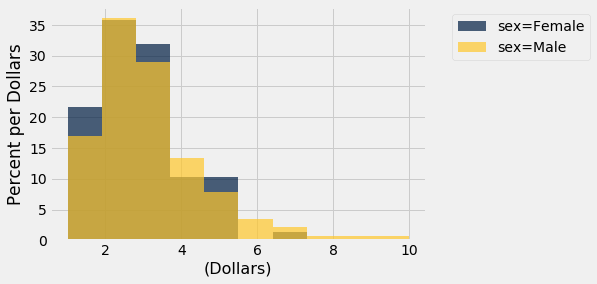

In [7]:
tip_histogram = tips.hist('tip', unit='Dollars', group='sex')

b. Repeat part a, but broken down by time.

In [12]:
avg_dinner_tip = np.mean(tips.where('time', are.containing('Dinner')).column('tip'))
avg_dinner_tip

3.102670454545454

In [13]:
avg_lunch_tip = np.mean(tips.where('time', are.containing('Lunch')).column('tip'))
avg_lunch_tip

2.728088235294118

C:\Users\C20Letai.Doudnikoff\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


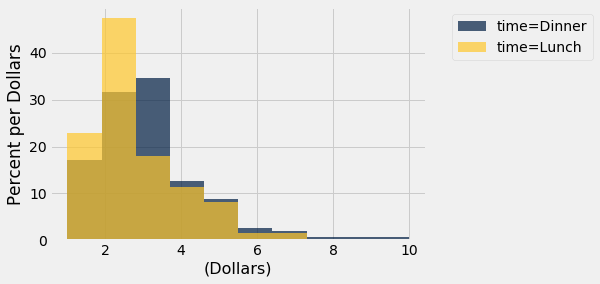

In [8]:
tips_by_time = tips.hist('tip', unit='Dollars', group='time')

2) Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues =2, … Sun = 7).

In [14]:
def weekday_to_num(day):
    """Input weekday and get a corresponding number of day of the week i.e. Monday = 1, Tuesday = 2..."""
    if day == 'Mon':
        return 1
    elif day == 'Tues':
        return 2
    elif day == 'Wed':
        return 3
    elif day == 'Thur':
        return 4
    elif day == 'Fri':
        return 5
    elif day == 'Sat':
        return 6
    else:
        return 7

In [15]:
weekday_to_num('Sun')

7

In [16]:
weekday_to_num('Mon')

1

In [17]:
weekday_to_num('Tues')

2

3) Apply this function to the day column of tips and include the result as a new column intips, called weekday_num.

In [18]:
weekday_num = tips.apply(weekday_to_num, 'day')
weekday_num

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 4])

In [19]:
tips.with_column('weekday_num', weekday_num)

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


4) Create a function called est_tip. The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this, we will look at “nearby” values (i.e. tip, where the value of total_bill is near the value of interest.) For example, if we want to predict the tip for total bill value of $20, we will simply look at all total bills near $20 and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. For example, for a window of $1, we will look at all bills totaling $19 thru $21. The output of
this function will be the predicted tip amount.

In [20]:
def est_tip(bill, nearby=1):
    """Estimates tip by looking at bills priced around the desired bill. Look around by bills nearby. Nearby default is one."""
    close_points = tips.where('total_bill', are.between(bill - nearby, bill + nearby))
    return close_points.column('tip').mean()

In [21]:
est_tip(20)

3.143333333333333

5) Apply this function to the total_bill column of tips and include the result as a new
column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip
amount.

In [22]:
tips_estimated = tips.apply(est_tip, 'total_bill')
tips_est_table = tips.with_column("estimated_tip", tips_estimated)
tips_est_table

total_bill,tip,sex,smoker,day,time,size,estimated_tip
16.99,1.01,Female,No,Sun,Dinner,2,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,4.19909
8.77,2,Male,No,Sun,Dinner,2,1.865
26.88,3.12,Male,No,Sun,Dinner,4,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,2.426
14.78,3.23,Male,No,Sun,Dinner,2,2.43833


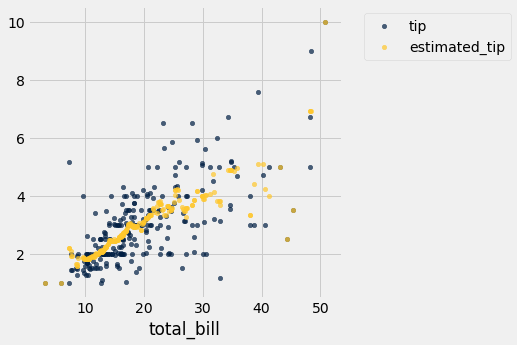

In [23]:
tips_est_table.select('total_bill','tip','estimated_tip').scatter('total_bill')